In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 2.7 MB/s 
     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 189 kB 52.9 MB/s 
     |████████████████████████████████| 1.2 MB 53.0 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 51 kB 318 kB/s 
     |████████████████████████████████| 558 kB 50.1 MB/s 
     |████████████████████████████████| 130 kB 56.3 MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()

In [ ]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'9pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

In [ ]:
matplotlib.rc('image', cmap='Greys')

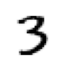

In [ ]:
show_image(three_tensors[1]);

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [ ]:
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [ ]:
len(stacked_sevens.shape)

3

In [ ]:
stacked_threes.ndim

3

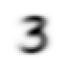

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

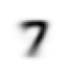

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

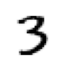

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3);

In [ ]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [ ]:
F.l1_loss(a_3.float(),mean3), F.mse_loss(a_3.float(),mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [ ]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
tns[1]

tensor([4, 5, 6])

In [ ]:
tns[:,1]

tensor([2, 5])

In [ ]:
tns[1,1:3]

tensor([5, 6])

In [ ]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [ ]:
tns.type()

'torch.LongTensor'

In [ ]:
type(tns)

torch.Tensor

In [ ]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [ ]:
tns*1.0

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
tns/2

tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])

In [ ]:
valid_3_tns = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tns = valid_3_tns.float()/255

valid_7_tns = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tns = valid_7_tns.float()/255

valid_3_tns.shape, valid_7_tns.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [ ]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [ ]:
valid_3_dist = mnist_distance(valid_3_tns,mean3)  
valid_3_dist, valid_3_dist.shape

(tensor([0.1321, 0.1199, 0.1181,  ..., 0.1287, 0.1321, 0.1169]),
 torch.Size([1010]))

In [ ]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [ ]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [ ]:
is_3(valid_3_tns)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [ ]:
accuracy_3s = is_3(valid_3_tns).float().mean()
accuracy_7s = (1 - is_3(valid_7_tns).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

#SGD

In [ ]:
def f(x): return x**2

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


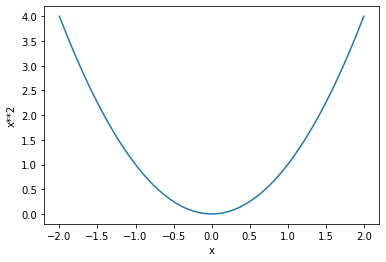

In [ ]:
plot_function(f, 'x', 'x**2');

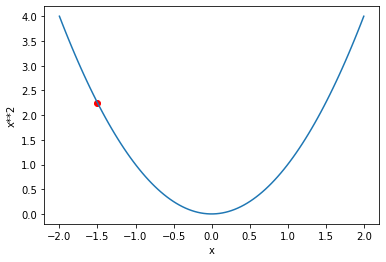

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(1.5), color='red');

In [ ]:
xt = tensor(3.).requires_grad_()  

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(6.)

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum()

In [ ]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

# SGD Example

In [ ]:
time = torch.arange(0, 20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

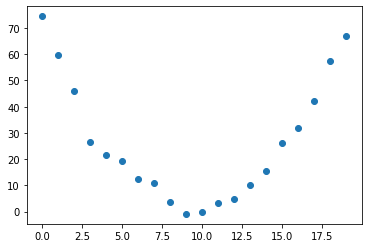

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [ ]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): return ((preds-targets)**2).mean()

#### Step 1:Initialize the parameters

In [ ]:
params = torch.randn(3).requires_grad_()

In [ ]:
orig_params = params.clone()

#### Step 2: Calculate the predictions

In [ ]:
preds = f(time, params)

In [ ]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)

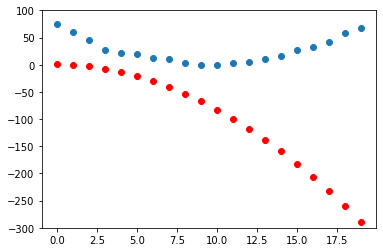

In [ ]:
show_preds(preds)

#### Step 3:Calculate the loss

In [ ]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

#### Step 4:Calculate the gradients

In [ ]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [ ]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [ ]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

#### Step 5: Step the weights

In [ ]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [ ]:
preds = f(time, params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

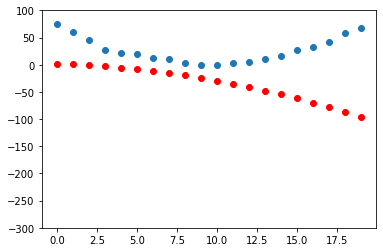

In [ ]:
show_preds(preds)

#### Step 6: Repeat the process

In [ ]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds


In [ ]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [ ]:
params = orig_params.detach().requires_grad_()

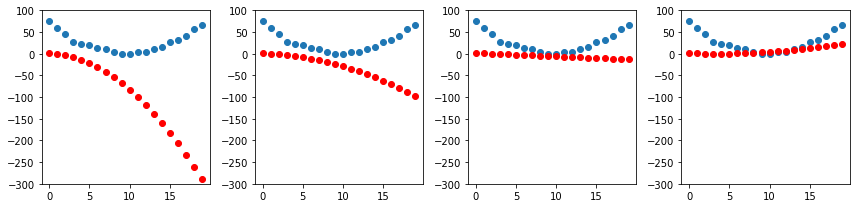

In [ ]:
_, axs = plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

#### Step 7: Stop

We just decided to stop after 10 epochs arbitrarily. In practice, we would watch the training and validation losses and our metrics to decide when to stop.

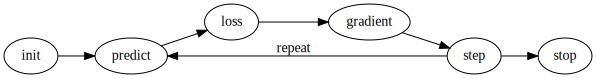

In [ ]:
gv('''init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')


# The MNIST Loss Function

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

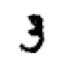

In [ ]:
show_image(x.view(28, 28));

In [ ]:
valid_x = torch.cat([valid_3_tns, valid_7_tns]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tns) + [0]*len(valid_7_tns)).unsqueeze(1)
valid_x.shape, valid_y.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

In [ ]:
valid_dset = list(zip(valid_x,valid_y))
len(valid_dset)

2038

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std)

In [ ]:
weights = init_params((28*28,1))

In [ ]:
bias = init_params(1)

In [ ]:
# prediction for one image
(train_x[0]*weights.T).sum() + bias

tensor([20.2336])

In [ ]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]])

In [ ]:
preds.shape

torch.Size([12396, 1])

In [ ]:
#let's check accuracy
corrects = (preds > 0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [ ]:
corrects.float().mean().item()

0.49080348014831543

In [ ]:
#let's make a small change in one of the weights and see what happens with the accuracy
weights[0] *= 1.0001

In [ ]:
preds = linear1(train_x)
((preds > 0.5).float() == train_y).float().mean().item()

0.49080348014831543

we can see that a very small change in the value of a weight will often not actually change the accuracy at all.

In [ ]:
# here the threshold is 0.5: if prediction is over 0.5, then it's a 3 or else a 7.
trgts = tensor([1, 0, 1])
prds = tensor([0.9, 0.4, 0.2])

In [ ]:
def mnist_loss(predictions, targets):
  return torch.where(targets==1, 1 - predictions, predictions).mean()

In [ ]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
mnist_loss(prds, trgts)

tensor(0.4333)

For instance, if we change our prediction for the one "false" target from 0.2 to 0.8 the loss will go down, indicating that this is a better prediction:

In [ ]:
mnist_loss(tensor([0.9, 0.4, 0.8]), trgts)

tensor(0.2333)

One problem with mnist_loss as currently defined is that it assumes that predictions are always between 0 and 1.

# Sigmoid Function

The sigmoid function always outputs a number b/w 0 and 1

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

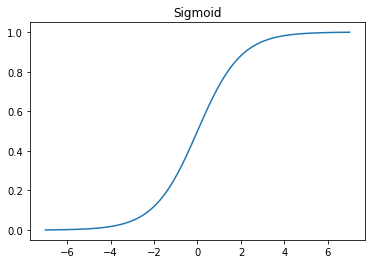

In [ ]:
# Pytorch already have a defined sigmoid function
plot_function(torch.sigmoid, title='Sigmoid', min=-7, max=7)

In [ ]:
#let's update mnist_loss function with sigmoid:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()


## SGD And Mini-batches

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
list(dl)

[tensor([13,  6,  2,  4, 12]),
 tensor([8, 5, 7, 3, 9]),
 tensor([14,  0, 11, 10,  1])]

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [ ]:
list(dl)

[(tensor([14, 19, 24,  3,  8,  2]), ('o', 't', 'y', 'd', 'i', 'c')),
 (tensor([12, 16, 13,  5,  9, 15]), ('m', 'q', 'n', 'f', 'j', 'p')),
 (tensor([22, 17, 21,  0,  1, 23]), ('w', 'r', 'v', 'a', 'b', 'x')),
 (tensor([25, 18,  7, 10,  4, 11]), ('z', 's', 'h', 'k', 'e', 'l')),
 (tensor([ 6, 20]), ('g', 'u'))]

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=False)
list(dl)

[(tensor([0, 1, 2, 3, 4, 5]), ('a', 'b', 'c', 'd', 'e', 'f')),
 (tensor([ 6,  7,  8,  9, 10, 11]), ('g', 'h', 'i', 'j', 'k', 'l')),
 (tensor([12, 13, 14, 15, 16, 17]), ('m', 'n', 'o', 'p', 'q', 'r')),
 (tensor([18, 19, 20, 21, 22, 23]), ('s', 't', 'u', 'v', 'w', 'x')),
 (tensor([24, 25]), ('y', 'z'))]

In [ ]:
list(dl)

[(tensor([0, 1, 2, 3, 4, 5]), ('a', 'b', 'c', 'd', 'e', 'f')),
 (tensor([ 6,  7,  8,  9, 10, 11]), ('g', 'h', 'i', 'j', 'k', 'l')),
 (tensor([12, 13, 14, 15, 16, 17]), ('m', 'n', 'o', 'p', 'q', 'r')),
 (tensor([18, 19, 20, 21, 22, 23]), ('s', 't', 'u', 'v', 'w', 'x')),
 (tensor([24, 25]), ('y', 'z'))]

# Putting it all together

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
# mini-batch of size 4 for testing
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([[-7.4451],
        [-9.4800],
        [-8.0913],
        [-7.7861]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9997, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-5.2777e-05), tensor([-0.0003]))

In [ ]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0001), tensor([-0.0007]))

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0002), tensor([-0.0010]))

The gradients have changed! The reason for this is that loss.backward actually adds the gradients of loss to any gradients that are currently stored. So, we have to set the current gradients to 0 first:

In [ ]:
weights.grad.zero_()
bias.grad.zero_();

In Pytorch, the method names that end in an underscore modify their objects in place.For instance, bias.zero_() sets all elements of the tensor bias to 0.

In [ ]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad * lr
      p.grad.zero_()

In [ ]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [ ]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [ ]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.3542

In [ ]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6286

In [ ]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.7868 0.8846 0.9178 0.9334 0.9368 0.9471 0.95 0.9535 0.9544 0.9559 0.9583 0.9613 0.9622 0.9632 0.9642 0.9652 0.9657 0.9672 0.9687 0.9696 

## Creating an Optimizer

nn.Linear does the same thing as our init_params and linear together. It contains both the weights and biases in a single class.

In [ ]:
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self,params,lr): self.params, self.lr = list(params), lr

  def step(self, *args, **kwargs): 
    for p in self.params: p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.6966

In [ ]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.4932 0.7973 0.8525 0.9165 0.9355 0.9472 0.957 0.9628 0.9658 0.9667 0.9697 0.9711 0.9746 0.9751 0.976 0.977 0.9775 0.978 0.978 0.9785 

fastai provides the **SGD** class which, by default, does the same thing as our BasicOptim:

In [ ]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.9145 0.8008 0.9062 0.9306 0.9443 0.954 0.9619 0.9643 0.9667 0.9692 0.9711 0.9731 0.9746 0.9755 0.976 0.9775 0.9775 0.9785 0.9785 

fastai also provides **Learner.fit**, which we can use instead of **train_model**.

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636856,0.503651,0.495584,00:00
1,0.596260,0.160360,0.876349,00:00
2,0.216385,0.199107,0.818449,00:00
3,0.093193,0.111049,0.910697,00:00
4,0.047861,0.079654,0.932287,00:00
5,0.030258,0.063328,0.946025,00:00
6,0.023103,0.053282,0.954858,00:00
7,0.019990,0.046627,0.961236,00:00
8,0.018458,0.041969,0.965162,00:00
9,0.017566,0.038557,0.967615,00:00


With these classes, we can now replace our linear model with a neural network.

Here is the entire definition of a basic neural network.

Add something nonlinear between two linear classifiers—this is what gives us a neural network.

In [ ]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

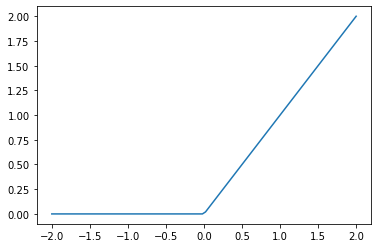

In [ ]:
plot_function(torch.relu)

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
learn = Learner(dls, simple_net, loss_func=mnist_loss, 
                opt_func=SGD, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.284743,0.410170,0.507360,00:00
1,0.136559,0.220562,0.814033,00:00
2,0.077320,0.113300,0.916585,00:00
3,0.051834,0.077096,0.940137,00:00
4,0.039834,0.060366,0.957802,00:00
5,0.033606,0.050959,0.963690,00:00
6,0.029975,0.045016,0.964671,00:00
7,0.027581,0.040950,0.966634,00:00
8,0.025839,0.037980,0.969087,00:00
9,0.024481,0.035700,0.970069,00:00


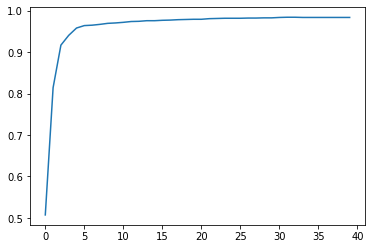

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
learn.recorder.values[-1][2]

0.983316957950592

## Going deeper

Here what happens when we train an 18-layer model using the same approach we saw in <>:

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.080212,0.015575,0.995584,03:22


Nearly 100% accuracy! That's a big difference compared to our simple neural net.